In [1]:
from utils import predictors, data_loading as dl
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sunspots = dl.DataLoader(dl.DATASET.SUNSPOTS)
electricity = dl.DataLoader(dl.DATASET.ELECTRICITY)
mackey_glass = dl.DataLoader(dl.DATASET.MACKEY_GLASS)
temperature = dl.DataLoader(dl.DATASET.TEMPERATURE)

/Users/czyjtu/dev/time-series-forecasting/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL_DIR = Path().cwd().parent / "models/tft"

model_electricity = predictors.TFTPredictor().load(str(MODEL_DIR / "electricity08:06:31"))
model_sunspots = predictors.TFTPredictor().load(str(MODEL_DIR / "sunspots01:52:41"))
model_mackey_glass = predictors.TFTPredictor().load(str(MODEL_DIR / "mackey_glass08:16:47"))
model_temperature = predictors.TFTPredictor().load(str(MODEL_DIR / "temperature08:33:50"))

models = {
    "electricity": model_electricity,
    "sunspots": model_sunspots,
    "mackey_glass": model_mackey_glass,
    "temperature": model_temperature,
}

In [3]:
def plot_predictions(y_train, y_test, y_hat_test):
    xrange_train = np.arange(y_train.shape[0])
    xrange_test = np.arange(y_train.shape[0], y_train.shape[0] + y_test.shape[0])
    sns.lineplot(y=y_train, x=xrange_train, label="train")
    sns.lineplot(y=y_test, x=xrange_test, label="test")
    sns.lineplot(y=y_hat_test, x=xrange_test, label="prediction")
    # plot vertical dotted line
    plt.axvline(x=y_train.shape[0], linestyle="--", color="black")
    plt.legend()

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/czyjtu/dev/time-series-forecasting/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 1/1 [00:06<00:00,  6.72s/it]
(653, 1) (653,)


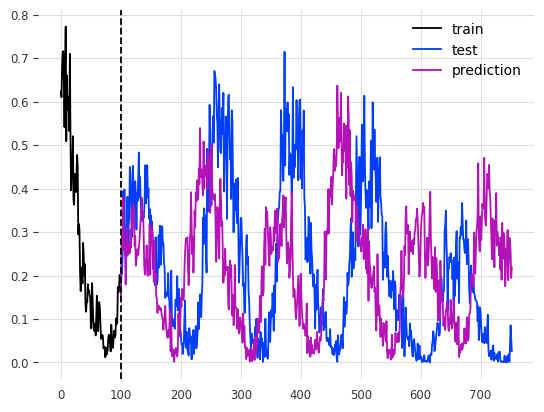

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/czyjtu/dev/time-series-forecasting/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 1/1 [00:09<00:00,  9.89s/it]
(1000, 1) (7891,)


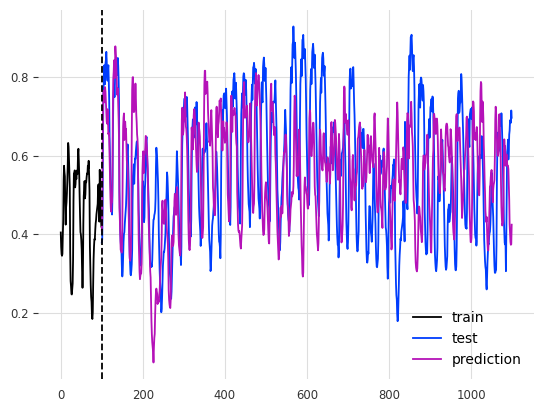

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/czyjtu/dev/time-series-forecasting/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]
(241, 1) (241,)


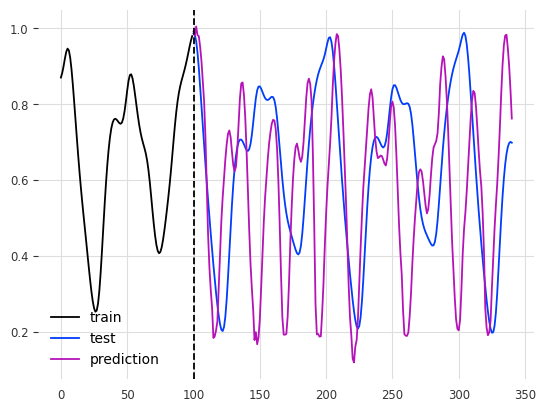

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/czyjtu/dev/time-series-forecasting/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]
(378, 1) (378,)


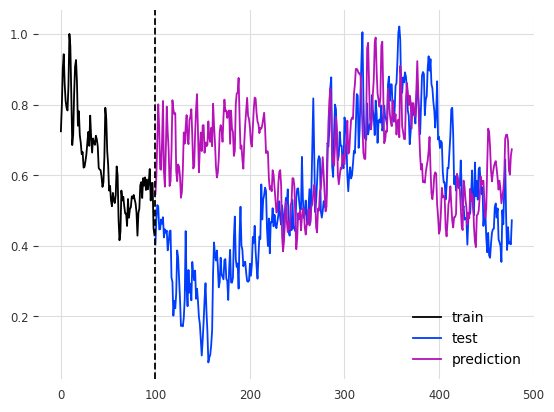

In [5]:

datasets = [sunspots, electricity, mackey_glass, temperature]
for dataset in datasets:
    y_val = dataset.y_val.flatten()
    model = models[dataset.name]
    horizon = min(10 * model.input_chunk_length, y_val.shape[0])
    y_pred = model.forecast(horizon)
    print(y_pred.shape, y_val.shape)
    
    plot_predictions(dataset.y_train[-model.input_chunk_length: ].flatten(), y_val[:horizon], y_pred.flatten())
    plt.show()